## **USE CASE 1: Ride Operations Analytics**

### **Import Data and Libraries**

In [61]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import squarify  # for treemap plotting
# pd: 2.2.3
# np: 1.26.4
# pip install --upgrade 'numpy<2.0' 'pandas>=2.2'

In [63]:
rides = pd.read_parquet("output/rides/part-00001-193ccff4-1e19-4de4-9351-59157676afbd-c000.snappy.parquet")
print(rides.columns)
rides.head()

Index(['event_id', 'ride_id', 'event_type', 'timestamp', 'user_id',
       'driver_id', 'pickup_latitude', 'pickup_longitude', 'pickup_address',
       'pickup_city', 'dropoff_latitude', 'dropoff_longitude',
       'dropoff_address', 'dropoff_city', 'distance_km',
       'estimated_duration_minutes', 'actual_duration_minutes', 'vehicle_type',
       'base_fare', 'surge_multiplier', 'total_fare', 'payment_method',
       'payment_status', 'payment_id', 'user_to_driver_rating',
       'driver_to_user_rating', 'user_comment', 'driver_comment',
       'canceled_by', 'cancellation_reason', 'cancellation_fee',
       'traffic_level', 'estimated_delay_minutes', 'driver_latitude',
       'driver_longitude', 'driver_heading', 'driver_speed_kmh', 'app_version',
       'platform', 'session_id'],
      dtype='object')


,event_id,ride_id,event_type,timestamp,user_id,driver_id,pickup_latitude,pickup_longitude,pickup_address,pickup_city,...,cancellation_fee,traffic_level,estimated_delay_minutes,driver_latitude,driver_longitude,driver_heading,driver_speed_kmh,app_version,platform,session_id
0,840635ac913c_2,R-09d4bf5d2f,RIDE_CANCELED_BY_USER,2024-12-31 23:49:37.316,U000030,None,40.416877,-3.703627,7474 Calle de Preciados,Madrid,...,0.0,LOW,0,NaN,NaN,NaN,NaN,4.6.0,iOS,S-6c16a1af
1,45c96b673223_1,R-c1ef09ad51,RIDE_REQUESTED,2024-12-31 23:16:07.125,U000050,None,40.461389,-3.676637,5422 Paseo de la Castellana,Madrid,...,NaN,LOW,0,NaN,NaN,NaN,NaN,4.6.2,Android,S-045d15d5
2,45c96b673223_3,R-c1ef09ad51,DRIVER_ARRIVED,2024-12-31 23:22:36.197,U000050,D000080,40.461389,-3.676637,5422 Paseo de la Castellana,Madrid,...,NaN,LOW,0,40.461389,-3.676637,7.502028,0.000000,4.6.2,Android,S-045d15d5
3,45c96b673223_4,R-c1ef09ad51,RIDE_STARTED,2024-12-31 23:25:35.251,U000050,D000080,40.461389,-3.676637,5422 Paseo de la Castellana,Madrid,...,NaN,LOW,0,40.461389,-3.676637,186.922989,19.497059,4.6.2,Android,S-045d15d5
4,06ab4b16e582_1,R-502467a203,RIDE_REQUESTED,2024-12-31 23:41:37.327,U000265,None,40.416805,-3.703621,5922 Plaza del Sol,Madrid,...,NaN,LOW,0,NaN,NaN,NaN,NaN,4.5.2,iOS,S-99e21808


In [64]:
special = pd.read_parquet("output/specials/part-00000-61ebba59-2335-4486-9e73-f3e95ffdebd6-c000.snappy.parquet")
print(special.columns)
special.head()

Index(['event_type', 'event_name', 'venue_zone', 'venue_latitude',
       'venue_longitude', 'venue_address', 'venue_city', 'event_start',
       'event_end', 'arrivals_start', 'arrivals_end', 'departures_start',
       'departures_end', 'arrival_rides', 'departure_rides',
       'estimated_attendees'],
      dtype='object')


,event_type,event_name,venue_zone,venue_latitude,venue_longitude,venue_address,venue_city,event_start,event_end,arrivals_start,arrivals_end,departures_start,departures_end,arrival_rides,departure_rides,estimated_attendees
0,sports,Atlético de Madrid vs Sevilla FC Game,malasana,40.426498,-3.7025,301 Sports Stadium,Madrid,2025-01-01 16:00:00,2025-01-01 19:00:00,2025-01-01 14:00:00,2025-01-01 16:15:00,2025-01-01 18:45:00,2025-01-01 20:30:00,3113,4003,37080
1,concert,Concert Event 2,airport,40.498299,-3.5676,598 Airport Calle,Madrid,2025-01-01 19:00:00,2025-01-01 22:00:00,2025-01-01 16:00:00,2025-01-01 19:15:00,2025-01-01 21:30:00,2025-01-02 00:00:00,2090,2351,8004
2,concert,Concert Event 2,airport,40.498299,-3.5676,598 Airport Calle,Madrid,2025-01-01 19:00:00,2025-01-01 22:00:00,2025-01-01 16:00:00,2025-01-01 19:15:00,2025-01-01 21:30:00,2025-01-02 00:00:00,2090,2351,8004
3,sports,Atlético de Madrid vs Sevilla FC Game,malasana,40.426498,-3.7025,301 Sports Stadium,Madrid,2025-01-01 16:00:00,2025-01-01 19:00:00,2025-01-01 14:00:00,2025-01-01 16:15:00,2025-01-01 18:45:00,2025-01-01 20:30:00,3113,4003,37080


### **Operational Overview**

Purpose: Provide a top-level snapshot of system performance.
Two metrics: 
- Ride State Counts: Number of requested rides, active rides, and completed rides.
*This shows the overall volume and status of rides in the system.*
- Speed of Service: Average driver response time (in seconds) and average ride duration (in minutes).
*These metrics reveal how efficiently the service is operating.*

#### Ride Status Counts

This analysis examines the different states of rides in the system by tracking unique ride IDs across various event types. The analysis categorizes rides into three main groups:

*Event Types*
- **Terminal Events**: Events that mark the end of a ride's lifecycle
  - `RIDE_COMPLETED`
  - `RIDE_CANCELED_BY_USER`
  - `RIDE_CANCELED_BY_DRIVER`

*Ride Categories*

1. **Requested Rides**
   - Rides that have been requested but never reached a terminal event
   - These are rides that are stuck in the "requested" state
   - Calculated as: `requested_set - terminal_set`

2. **Active Rides**
   - Rides that have started but haven't reached a terminal event
   - These are currently ongoing rides
   - Calculated as: `started_set - terminal_set`

3. **Completed Rides**
   - Rides that have successfully reached completion
   - Simply the set of ride IDs with a `RIDE_COMPLETED` event

*Methodology*
The analysis uses set operations to:
- Track unique ride IDs for each event type
- Identify terminal events (completion or cancellation)
- Calculate the number of rides in each category by performing set differences

This analysis helps identify:
- How many rides are stuck in the requested state
- How many rides are currently active
- The total number of successfully completed rides

In [65]:
# Define terminal event types (completed or canceled)
terminal_events = {"RIDE_COMPLETED", "RIDE_CANCELED_BY_USER", "RIDE_CANCELED_BY_DRIVER"}

# Compute unique ride_ids by event_type:
requested_set = set(rides.loc[rides['event_type'] == 'RIDE_REQUESTED', 'ride_id'].unique())
started_set   = set(rides.loc[rides['event_type'] == 'RIDE_STARTED', 'ride_id'].unique())
completed_set = set(rides.loc[rides['event_type'] == 'RIDE_COMPLETED', 'ride_id'].unique())
cancelled_set = set(rides.loc[rides['event_type'].isin(["RIDE_CANCELED_BY_USER", "RIDE_CANCELED_BY_DRIVER"]), 'ride_id'].unique())

# Terminal rides are those with any terminal event (completed or canceled)
terminal_set = completed_set.union(cancelled_set)

# ------------------------------------------------------------
# 1. Requested Rides: Rides that have been requested but never reached a terminal event.
#    (If a ride ever moved past "RIDE_REQUESTED" into a terminal event, we don't count it.)
# ------------------------------------------------------------
requested_rides = requested_set - terminal_set

# ------------------------------------------------------------
# 2. Active Rides: Rides that have begun (RIDE_STARTED) but have not yet reached a terminal event.
# ------------------------------------------------------------
active_rides = started_set - terminal_set

# ------------------------------------------------------------
# 3. Completed Rides: Simply the set of ride_ids with a RIDE_COMPLETED event.
# ------------------------------------------------------------
completed_rides = completed_set

# Print results:
print("Number of requested rides (requested but not terminal):", len(requested_rides))
print("Number of active rides (started but not terminal):", len(active_rides))
print("Number of completed rides:", len(completed_rides))


Number of requested rides (requested but not terminal): 568
Number of active rides (started but not terminal): 459
Number of completed rides: 639


#### Speed of Service

This analysis calculates two important timing metrics for the ride-sharing system: driver response time and ride duration.

**1. Driver Response Time Analysis**
This metric measures how quickly drivers respond to ride requests.

*Methodology*:
- Converts timestamp to datetime format for accurate time calculations
- Identifies two key events:
  - `RIDE_REQUESTED`: When a user requests a ride
  - `DRIVER_ASSIGNED`: When a driver accepts the ride
- Calculates the time difference between these events in seconds
- Computes the average response time across all rides

**2. Ride Duration Analysis**
This metric measures how long completed rides take from start to finish.

*Methodology*:
- Tracks two key events:
  - `RIDE_STARTED`: When the ride begins
  - `RIDE_COMPLETED`: When the ride ends
- Calculates the duration in two steps:
  1. Computes duration in seconds
  2. Converts to minutes for more readable results
- Computes the average ride duration across all completed rides

**Key Metrics**
- *Driver Response Time*: Average time (in seconds) between ride request and driver assignment
- *Ride Duration*: Average time (in minutes) between ride start and completion

These metrics are crucial for:
- Evaluating driver performance and responsiveness
- Understanding typical ride durations
- Identifying potential areas for service improvement

In [66]:
# -------------------------------
# Ensure that event_time column is computed 
# -------------------------------
rides['event_time'] = pd.to_datetime(rides['timestamp'], unit='ms')

# -------------------------------
# 1. Driver Response Time (in seconds)
# -------------------------------
# Filter the rides for the needed events:
requested_df = rides[rides['event_type'] == 'RIDE_REQUESTED'][['ride_id', 'event_time']]
assigned_df  = rides[rides['event_type'] == 'DRIVER_ASSIGNED'][['ride_id', 'event_time']]

# Merge requested and assigned events on ride_id
response_df = pd.merge(requested_df, assigned_df, on='ride_id', suffixes=('_requested', '_assigned'))

# Compute response time in seconds (no conversion to minutes)
response_df['response_time_sec'] = (response_df['event_time_assigned'] - response_df['event_time_requested']).dt.total_seconds()
avg_response_time_sec = response_df['response_time_sec'].mean()

print("Average driver response time (sec):", round(avg_response_time_sec, 2))


# -------------------------------
# 2. Ride Duration (in minutes)
# -------------------------------
# Filter the rides for the needed events:
started_df  = rides[rides['event_type'] == 'RIDE_STARTED'][['ride_id', 'event_time']]
completed_df = rides[rides['event_type'] == 'RIDE_COMPLETED'][['ride_id', 'event_time']]

# Merge started and completed events on ride_id
duration_df = pd.merge(started_df, completed_df, on='ride_id', suffixes=('_started', '_completed'))

# Compute ride duration in seconds then convert to minutes
duration_df['ride_duration_sec'] = (duration_df['event_time_completed'] - duration_df['event_time_started']).dt.total_seconds()
duration_df['ride_duration_min'] = duration_df['ride_duration_sec'] / 60.0
avg_ride_duration_min = duration_df['ride_duration_min'].mean()

print("Average ride duration (min):", round(avg_ride_duration_min, 2))


Average driver response time (sec): 17.79
Average ride duration (min): 12.05


### **Real-Time Trends**

Purpose: Show how the system's performance evolves over time. Two metrics:

- Rides Per Hour: Use a tumbling window to display how many rides are requested in each hour.
- Ride Efficiency Index: A sliding window (e.g., a 15-minute rolling average) that shows the ratio of actual to estimated ride durations.

#### Time-Based Ride Request Analysis

This analysis examines the temporal patterns of ride requests using a tumbling window approach.

1. **Data Preparation**
   - Sorts all ride events by timestamp
   - Filters for `RIDE_REQUESTED` events only
   - Sets event time as the index for time-based operations

2. **Tumbling Window Analysis**
   - Uses non-overlapping hourly windows ('H')
   - Counts unique ride requests per hour
   - Creates a time series of ride request frequency


This visualization helps identify:
- Peak demand periods
- Daily patterns in ride requests
- Overall temporal distribution of ride demand

/var/folders/tg/8k_dxcxj2tlgnqhv569wql7r0000gn/T/ipykernel_9033/1240733960.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rides_per_hour = rides_requested['ride_id'].resample('H').nunique()


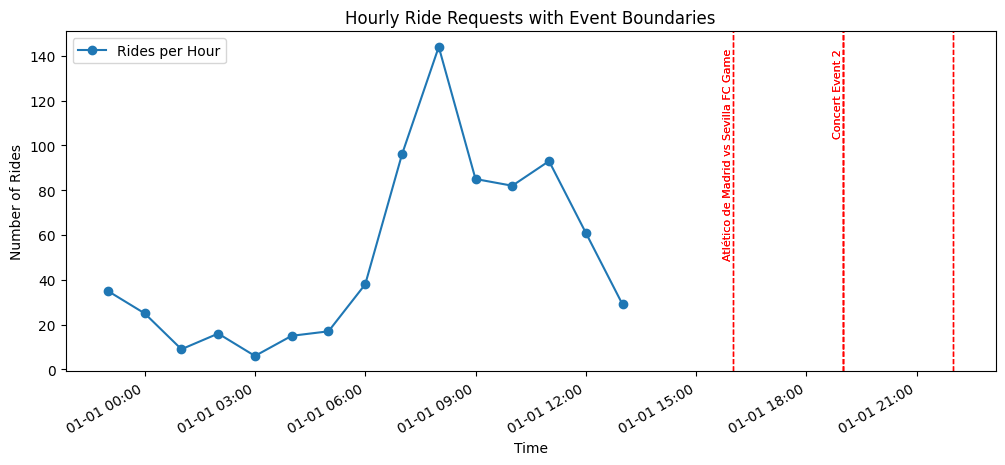

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Assumes `rides` and `special` DataFrames are loaded, and rides indexed by event_time ---

# 1. Prepare the special events' start/end as datetimes
special['event_start_dt'] = pd.to_datetime(special['event_start'])
special['event_end_dt']   = pd.to_datetime(special['event_end'])

# 2. Compute rides per hour as before
rides_requested = rides[rides['event_type'] == 'RIDE_REQUESTED'].copy()
rides_requested.set_index('event_time', inplace=True)
rides_per_hour = rides_requested['ride_id'].resample('H').nunique()

# 3. Plot tumbling window results
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(rides_per_hour.index, rides_per_hour.values, marker='o', label='Rides per Hour')

# 4. Add dashed red vertical lines for each event boundary
for _, ev in special.iterrows():
    ax.axvline(ev['event_start_dt'], color='red', linestyle='--', linewidth=1)
    ax.axvline(ev['event_end_dt'],   color='red', linestyle='--', linewidth=1)
    # optional: label the start line
    ax.text(ev['event_start_dt'], ax.get_ylim()[1]*0.95, ev['event_name'],
            rotation=90, va='top', ha='right', color='red', fontsize=8)

# 5. Format axes
ax.set_xlabel('Time')
ax.set_ylabel('Number of Rides')
ax.set_title('Hourly Ride Requests with Event Boundaries')
ax.legend()

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
fig.autofmt_xdate()

plt.show()

#### Ride Efficiency Index (REI) Analysis

This analysis evaluates the efficiency of completed rides by comparing actual versus estimated durations.

1. **Data Preparation**
   - Filters for completed rides only
   - Removes entries with zero estimated duration
   - Calculates efficiency ratio: `actual_duration / estimated_duration`

2. **Time-Based Analysis**
   - Aggregates data into 1-minute intervals
   - Applies a 15-minute sliding window
   - Computes rolling average of efficiency ratios

**Interpretation**
- Ratio > 1.0: Rides taking longer than estimated
- Ratio < 1.0: Rides completing faster than estimated
- Ratio = 1.0: Perfect estimation accuracy
- Rolling window helps identify trends and smooth out noise

/var/folders/tg/8k_dxcxj2tlgnqhv569wql7r0000gn/T/ipykernel_6885/4088081846.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  efficiency_per_minute = completed_rides['efficiency_ratio'].resample('1T').mean()


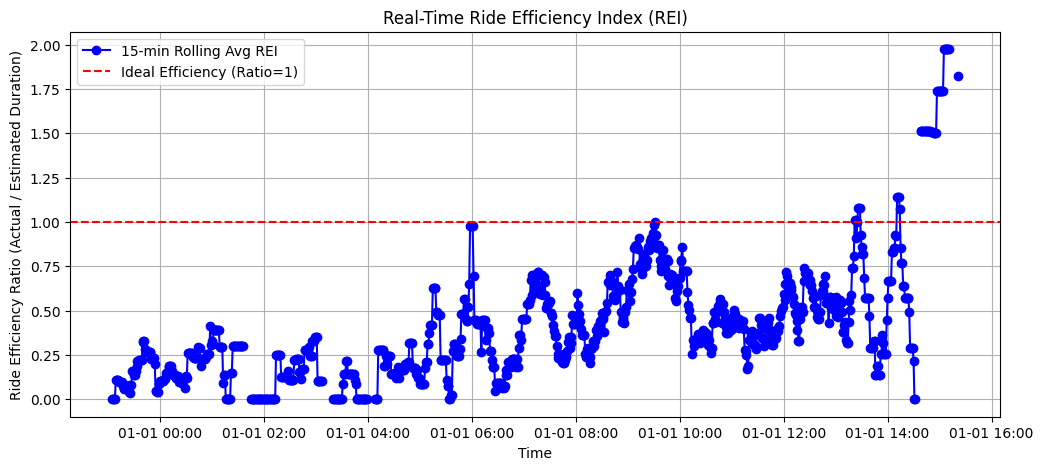

In [66]:
# -------------------------------
# Preprocessing: filter completed rides
# -------------------------------
# Filter for completed rides
completed_rides = rides[rides['event_type'] == 'RIDE_COMPLETED'].copy()

# Make sure we remove cases where estimated_duration_minutes might be zero (avoid division by zero) and NaN
completed_rides = completed_rides[completed_rides['estimated_duration_minutes'].notna()]
completed_rides = completed_rides[completed_rides['estimated_duration_minutes'] > 0]

# -------------------------------
# Compute the Ride Efficiency Ratio (REI) for each completed ride
# -------------------------------
# REI is defined as the ratio of actual to estimated duration
completed_rides['efficiency_ratio'] = completed_rides['actual_duration_minutes'] / completed_rides['estimated_duration_minutes']

# -------------------------------
# Set event_time as index and resample into 1-minute buckets
# -------------------------------
completed_rides.set_index('event_time', inplace=True)

# Resample to 1-minute intervals. For each minute, compute the mean efficiency ratio
efficiency_per_minute = completed_rides['efficiency_ratio'].resample('1T').mean()

# -------------------------------
# Create a sliding window: Rolling average efficiency ratio over a 15-minute window
# -------------------------------
# This rolling window updates every minute
rolling_efficiency = efficiency_per_minute.rolling(window=15, min_periods=1).mean()

# -------------------------------
# Plot the Ride Efficiency Index over time with formatted time axis
# -------------------------------
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(rolling_efficiency.index, rolling_efficiency.values, marker='o', linestyle='-', color='b', label='15-min Rolling Avg REI')
ax.axhline(y=1.0, color='r', linestyle='--', label='Ideal Efficiency (Ratio=1)')
ax.set_xlabel('Time')
ax.set_ylabel('Ride Efficiency Ratio (Actual / Estimated Duration)')
ax.set_title('Real-Time Ride Efficiency Index (REI)')

# Format the x-axis to display the time properly
ax.xaxis.set_major_locator(mdates.AutoDateLocator())                  # Automatically choose good tick locations
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))         # Format dates as month-day hour:minute


ax.legend()
ax.grid(True)
plt.show()

### **Driver Performance (Driver Quality)**

Purpose: Assess the quality of the drivers, which is critical to both supply effectiveness and customer satisfaction. Metric:
- Driver Categorization: Classify drivers as Gold, Silver, or Bronze based on average user ratings.
- Additional driver-specific performance metrics

#### Driver Performance Categorization 

This analysis evaluates driver performance using multiple metrics and categorizes drivers into tiers based on their ratings.

Drivers are classified into three tiers based on average user ratings:
- **Gold**: Rating ≥ 4.5
- **Silver**: Rating ≥ 4.0
- **Bronze**: Rating < 4.0

*Performance Metrics*
The analysis computes four key metrics per driver:
1. **User Rating**: Average rating from passengers
2. **Response Time**: Average time to accept rides (in seconds)
3. **Completed Rides**: Total number of successfully completed rides
4. **Ride Duration**: Average duration of completed rides (in minutes)

*Analysis Process*
1. **Data Preparation**
   - Converts timestamps to datetime
   - Filters relevant events (REQUESTED, ASSIGNED, STARTED, COMPLETED)
   - Computes time-based metrics

2. **Aggregation**
   - Groups metrics by driver category
   - Calculates averages for each performance metric
   - Counts drivers in each category

This analysis helps identify:
- Performance patterns across driver tiers
- Distribution of driver quality
- Relationship between ratings and operational metrics

Summary by Driver Category:
Category: Bronze
  Average Response Time (sec): 17.33
  Average Completed Rides: 6.67
  Average Ride Duration (min): 8.80
  Total Drivers: 49
------------------------------------------
Category: Gold
  Average Response Time (sec): 17.91
  Average Completed Rides: 3.25
  Average Ride Duration (min): 6.80
  Total Drivers: 8
------------------------------------------
Category: Silver
  Average Response Time (sec): 18.84
  Average Completed Rides: 6.81
  Average Ride Duration (min): 11.45
  Total Drivers: 42
------------------------------------------


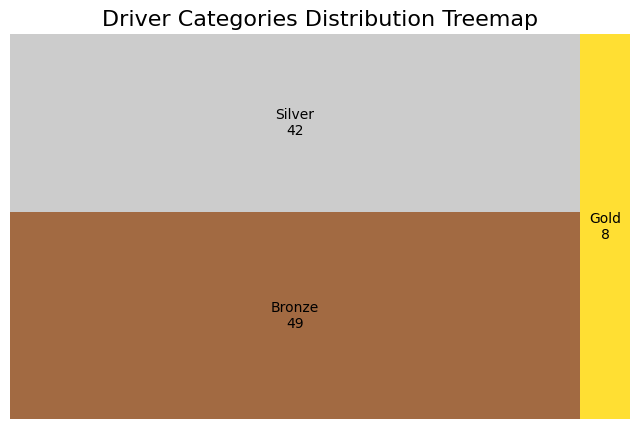

In [51]:
# -----------------------------------------------------------------------------
# 1. DRIVER CATEGORIZATION BASED ON USER RATING
# -----------------------------------------------------------------------------
# Compute average rating per driver using the 'user_to_driver_rating' column.
# Only consider rows where a rating is available.
avg_driver_rating = rides[rides['user_to_driver_rating'].notna()].groupby('driver_id')['user_to_driver_rating'].mean()

def categorize_rating(rating):
    if rating >= 4.5:
        return 'Gold'
    elif rating >= 4.0:
        return 'Silver'
    else:
        return 'Bronze'

# Apply categorization and create a DataFrame with driver categories
driver_category = avg_driver_rating.apply(categorize_rating).rename('driver_category')
driver_category_df = driver_category.reset_index()

# -----------------------------------------------------------------------------
# 2. AVERAGE DRIVER RESPONSE TIME (in seconds)
# -----------------------------------------------------------------------------
# Convert timestamp to datetime
rides['event_time'] = pd.to_datetime(rides['timestamp'], unit='ms')

# Filter events for RIDE_REQUESTED and DRIVER_ASSIGNED
requested_df = rides[rides['event_type'] == 'RIDE_REQUESTED'][['ride_id', 'event_time']]
assigned_df  = rides[rides['event_type'] == 'DRIVER_ASSIGNED'][['ride_id', 'event_time', 'driver_id']]

# Merge and compute response time
df_response = pd.merge(requested_df, assigned_df, on='ride_id', suffixes=('_requested', '_assigned'))
df_response['response_time_sec'] = (df_response['event_time_assigned'] - df_response['event_time_requested']).dt.total_seconds()
avg_response_per_driver = df_response.groupby('driver_id')['response_time_sec'].mean().reset_index()
avg_response_per_driver.rename(columns={'response_time_sec': 'avg_response_time_sec'}, inplace=True)

# -----------------------------------------------------------------------------
# 3. TOTAL NUMBER OF COMPLETED RIDES PER DRIVER
# -----------------------------------------------------------------------------
completed_by_driver = rides[rides['event_type'] == 'RIDE_COMPLETED'].groupby('driver_id')['ride_id'].nunique().reset_index()
completed_by_driver.rename(columns={'ride_id': 'completed_rides'}, inplace=True)

# -----------------------------------------------------------------------------
# 4. AVERAGE RIDE DURATION PER DRIVER (in minutes)
# -----------------------------------------------------------------------------
# Filter rides for start and completion events
started_df  = rides[rides['event_type'] == 'RIDE_STARTED'][['ride_id', 'event_time', 'driver_id']]
completed_df = rides[rides['event_type'] == 'RIDE_COMPLETED'][['ride_id', 'event_time']]

# Merge and compute duration
df_duration = pd.merge(started_df, completed_df, on='ride_id', suffixes=('_started', '_completed'))
df_duration['ride_duration_sec'] = (df_duration['event_time_completed'] - df_duration['event_time_started']).dt.total_seconds()
df_duration['ride_duration_min'] = df_duration['ride_duration_sec'] / 60.0
avg_duration_per_driver = df_duration.groupby('driver_id')['ride_duration_min'].mean().reset_index()
avg_duration_per_driver.rename(columns={'ride_duration_min': 'avg_ride_duration_min'}, inplace=True)

# -----------------------------------------------------------------------------
# 5. MERGE DRIVER METRICS WITH DRIVER CATEGORY
# -----------------------------------------------------------------------------
driver_metrics = driver_category_df.merge(avg_response_per_driver, on='driver_id', how='left') \
                                 .merge(completed_by_driver, on='driver_id', how='left') \
                                 .merge(avg_duration_per_driver, on='driver_id', how='left')

# -----------------------------------------------------------------------------
# 6. AGGREGATE METRICS BY DRIVER CATEGORY
# -----------------------------------------------------------------------------
category_summary = driver_metrics.groupby('driver_category').agg(
    avg_response_time_sec=('avg_response_time_sec', 'mean'),
    avg_completed_rides=('completed_rides', 'mean'),
    avg_ride_duration_min=('avg_ride_duration_min', 'mean'),
    driver_count=('driver_id', 'nunique')
).reset_index()

# Print detailed metrics per category
print("Summary by Driver Category:")
for _, row in category_summary.iterrows():
    print(f"Category: {row['driver_category']}")
    print(f"  Average Response Time (sec): {row['avg_response_time_sec']:.2f}")
    print(f"  Average Completed Rides: {row['avg_completed_rides']:.2f}")
    print(f"  Average Ride Duration (min): {row['avg_ride_duration_min']:.2f}")
    print(f"  Total Drivers: {row['driver_count']}")
    print("------------------------------------------")

# -----------------------------------------------------------------------------
# 7. VISUALIZE DRIVER CATEGORIES DISTRIBUTION
# -----------------------------------------------------------------------------
# Count drivers in each category
driver_category_counts = driver_category_df['driver_category'].value_counts()

# Prepare treemap data
categories = driver_category_counts.index.tolist()  
counts = driver_category_counts.values  
labels = [f"{cat}\n{count}" for cat, count in zip(categories, counts)]

# Create treemap visualization
plt.figure(figsize=(8, 5))
squarify.plot(sizes=counts, label=labels, color=['saddlebrown', 'silver', 'gold'], alpha=0.8)
plt.title("Driver Categories Distribution Treemap", fontsize=16)
plt.axis('off')
plt.show()


## ADD HOW MUCH EACH TYPE OF DRIVER HAS INCREASED OR DECREASED 


Measure the increase or decrease in the # for each type of driver week-per-week

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumes rides.index is event_time and user_to_driver_rating exists

# 1. Extract rating events and assign week periods
ratings = (
    rides[['driver_id', 'user_to_driver_rating']]
    .dropna(subset=['user_to_driver_rating'])
    .assign(week=lambda df: df.index.to_period('W'))
)

# 2. Compute weekly average rating per driver
weekly_avg = (
    ratings
    .groupby(['week', 'driver_id'])['user_to_driver_rating']
    .mean()
    .reset_index()
)

# 3. Categorize drivers
def categorize_rating(rating):
    if rating >= 4.5:
        return 'Gold'
    elif rating >= 4.0:
        return 'Silver'
    else:
        return 'Bronze'

weekly_avg['driver_category'] = weekly_avg['user_to_driver_rating'].apply(categorize_rating)

# 4. Count drivers per category each week
weekly_counts = (
    weekly_avg
    .groupby(['week', 'driver_category'])['driver_id']
    .nunique()
    .reset_index(name='count')
)

# 5. Pivot to have weeks as index and categories as columns
weekly_pivot = weekly_counts.pivot(index='week', columns='driver_category', values='count').fillna(0)

# 6. Compute week‑over‑week change
weekly_change = weekly_pivot.diff().fillna(0)

# 7. Display the latest week and its change
latest = weekly_pivot.index.max()
print(f"Driver Counts in Week {latest}:")
print(weekly_pivot.loc[latest])
print(f"\nWeek‑over‑Week Change for {latest}:")
print(weekly_change.loc[latest])



Driver Counts in Week 2024-12-30/2025-01-05:
driver_category
Bronze    49
Gold       8
Silver    42
Name: 2024-12-30/2025-01-05, dtype: int64

Week‑over‑Week Change for 2024-12-30/2025-01-05:
driver_category
Bronze    0.0
Gold      0.0
Silver    0.0
Name: 2024-12-30/2025-01-05, dtype: float64


### **Demand-Supply Matching**

Purpose: Evaluate how well ride requests are being fulfilled, which is crucial for minimizing waiting time and cancellations. Two Metrics:
- Overall Request Acceptance Rate: The ratio of ride requests that result in a driver assignment or ride start.
- Overall Cancellation Rate: The proportion of requested rides that are canceled (by either the driver or the customer).

#### Request Acceptance Rate

This metric measures the proportion of ride requests that are successfully accepted by drivers.

*Methodology*
- **Numerator**: Number of rides that were both requested and accepted (intersection of requested and accepted rides)
- **Denominator**: Total number of ride requests
- **Formula**: Accepted Requests / Total Requests

*Event Types Considered*
- **Requests**: `RIDE_REQUESTED` events
- **Acceptances**: Either `DRIVER_ASSIGNED` or `RIDE_STARTED` events

*Interpretation*
- Value ranges from 0% to 100%
- Higher rates indicate better service availability
- Lower rates may indicate driver shortage or service issues

This metric is crucial for:
- Evaluating service reliability
- Identifying potential driver availability issues
- Measuring overall service quality

In [ ]:
# ===============================
# Overall Request Acceptance Rate
# ===============================
# Define sets of unique ride_ids for requested and accepted events.
requested_set = set(rides[rides['event_type'] == 'RIDE_REQUESTED']['ride_id'])
accepted_set  = set(rides[rides['event_type'].isin(['DRIVER_ASSIGNED', 'RIDE_STARTED'])]['ride_id'])

# Only consider rides that were actually requested
accepted_requested = accepted_set.intersection(requested_set)

# Compute the overall acceptance rate.
overall_acceptance_rate = len(accepted_requested) / len(requested_set)
print("Overall Request Acceptance Rate: {:.2%}".format(overall_acceptance_rate))


Overall Request Acceptance Rate: 43.01%


#### Cancellation Rate

This metric measures the proportion of ride requests that are cancelled after being requested.

*Methodology*
- **Numerator**: Number of rides that were both requested and cancelled
- **Denominator**: Total number of ride requests
- **Formula**: Cancelled Requests / Total Requests

*Event Types Considered*
- **Requests**: `RIDE_REQUESTED` events
- **Cancellations**: Either `RIDE_CANCELED_BY_USER` or `RIDE_CANCELED_BY_DRIVER` events

*Interpretation*
- Value ranges from 0% to 100%
- Lower rates indicate better service reliability
- Higher rates may indicate:
  - User dissatisfaction
  - Driver availability issues
  - Service quality problems
  - Pricing or wait time concerns

This metric is crucial for:
- Identifying service reliability issues
- Understanding user behavior
- Improving service quality
- Optimizing pricing and wait times

In [39]:
# -------------------------------
# Overall Cancellation Rate
# -------------------------------

# Create a set of unique ride IDs that were requested.
requested_ids = set(rides[rides['event_type'] == 'RIDE_REQUESTED']['ride_id'])

# Create a set of unique ride IDs that were cancelled (by user or driver).
cancelled_ids = set(rides[rides['event_type'].isin(['RIDE_CANCELED_BY_USER', 'RIDE_CANCELED_BY_DRIVER'])]['ride_id'])

# To ensure we are only considering rides that were actually requested,
# take the intersection of the cancellation and request sets.
effective_cancelled_ids = requested_ids.intersection(cancelled_ids)

# Compute the overall cancellation rate.
overall_cancellation_rate = len(effective_cancelled_ids) / len(requested_ids)
print("Overall Cancellation Rate: {:.2%}".format(overall_cancellation_rate))


Overall Cancellation Rate: 3.73%


### **Customer Satisfaction Analysis**

Purpose: Provide an integrated view of how satisfied customers are with the service. Metric:
- Composite Customer Satisfaction Score: A weighted metric that combines average ratings, ride duration efficiency, and cancellation frequency.

#### Composite Customer Satisfaction Score
This metric provides a comprehensive evaluation of customer satisfaction through multiple weighted components.

*Components and Weights*
1. **Customer Rating Score (40%)**
   - Based on user-to-driver ratings (scale 1-5)
   - Normalized to 0-1 scale
   - Higher ratings indicate better satisfaction

2. **Duration Efficiency Score (30%)**
   - Measures actual vs. estimated ride duration
   - Ratio of actual/estimated duration
   - Score decreases as actual duration exceeds estimates
   - Perfect score (1.0) when actual = estimated
   - Score of 0 when actual ≥ 2x estimated

3. **Cancellation Score (30%)**
   - Based on ride cancellation rate
   - Considers both user and driver cancellations
   - Score decreases as cancellation rate increases
   - Perfect score (1.0) at 0% cancellation
   - Score of 0 at ≥50% cancellation

*Composite Score Calculation*
- Weighted sum of all three components
- Final score ranges from 0 to 1
- Higher scores indicate better overall service quality

*Interpretation*
- **High Score (0.8-1.0)**: Excellent service quality
- **Medium Score (0.5-0.8)**: Acceptable service with room for improvement
- **Low Score (<0.5)**: Significant service quality issues requiring attention

This metric helps:
- Track overall service quality
- Identify areas for improvement
- Monitor customer satisfaction trends
- Guide service optimization efforts

In [41]:
# -------------------------------------------------------
# 1. CUSTOMER RATING SCORE
# -------------------------------------------------------
# Compute the average user-to-driver rating for rides where a rating is available.
rating_rides = rides[rides['user_to_driver_rating'].notna()]
avg_rating = rating_rides['user_to_driver_rating'].mean()  # Scale 1 to 5

# Normalize the rating to a 0-1 scale (rating 1 -> 0, rating 5 -> 1)
rating_score = (avg_rating - 1) / 4
# rating_score now lies between 0 and 1

# -------------------------------------------------------
# 2. DURATION EFFICIENCY SCORE
# -------------------------------------------------------
# For completed rides, compute the efficiency ratio as:
# Efficiency Ratio = actual_duration_minutes / estimated_duration_minutes
completed_rides = rides[(rides['event_type'] == 'RIDE_COMPLETED') & 
                        (rides['estimated_duration_minutes'] > 0)].copy()
completed_rides['efficiency_ratio'] = (completed_rides['actual_duration_minutes'] /
                                         completed_rides['estimated_duration_minutes'])

# Compute the average efficiency ratio across rides
avg_efficiency_ratio = completed_rides['efficiency_ratio'].mean()

# Transform the efficiency ratio into a score:
# Ideal is ratio = 1 --> score = 1; ratio = 2 or greater --> score = 0.
# We use the linear mapping: score = max(0, min(2 - ratio, 1))
duration_score = np.clip(2 - avg_efficiency_ratio, 0, 1)

# -------------------------------------------------------
# 3. CANCELLATION SCORE
# -------------------------------------------------------
# Compute the cancellation rate as the proportion of rides with a cancellation event to rides requested.
# Define the requested rides as those with RIDE_REQUESTED
requested_ids = set(rides[rides['event_type'] == 'RIDE_REQUESTED']['ride_id'])
# Count cancellations from rides canceled by user or driver.
cancelled_ids = set(rides[rides['event_type'].isin(['RIDE_CANCELED_BY_USER', 'RIDE_CANCELED_BY_DRIVER'])]['ride_id'])
# Only consider cancellations for rides that were originally requested.
effective_cancelled = len(requested_ids.intersection(cancelled_ids))
cancellation_rate = effective_cancelled / len(requested_ids) if len(requested_ids) > 0 else 0

# For the cancellation score, assume an acceptable cancellation rate of 0.5 (50%):
# cancellation_score = 1 if rate = 0, and 0 if rate >= 0.5 (linearly decreasing in between)
cancellation_score = 1 - min(cancellation_rate / 0.5, 1)

# -------------------------------------------------------
# 4. COMPOSITE CUSTOMER SATISFACTION SCORE
# -------------------------------------------------------
# Define weights for each component; these sum to 1.
w_rating = 0.4
w_duration = 0.3
w_cancellation = 0.3

composite_score = (w_rating * rating_score) + (w_duration * duration_score) + (w_cancellation * cancellation_score)

# Print the intermediate values and the final composite score.
print("Average User Rating (1-5): {:.2f}".format(avg_rating))
print("Normalized Rating Score (0-1): {:.2f}".format(rating_score))
print("Average Efficiency Ratio (Actual/Estimated): {:.2f}".format(avg_efficiency_ratio))
print("Duration Efficiency Score (0-1): {:.2f}".format(duration_score))
print("Cancellation Rate: {:.2%}".format(cancellation_rate))
print("Cancellation Score (0-1): {:.2f}".format(cancellation_score))
print("Composite Customer Satisfaction Score: {:.2f}".format(composite_score))


Average User Rating (1-5): 3.99
Normalized Rating Score (0-1): 0.75
Average Efficiency Ratio (Actual/Estimated): 0.48
Duration Efficiency Score (0-1): 1.00
Cancellation Rate: 3.73%
Cancellation Score (0-1): 0.93
Composite Customer Satisfaction Score: 0.88


## **USE CASE 2: Carbon Footprint Tracker**

### **Import Data and Libraries**

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [31]:
#Convert the static_data from json files to pandas dataset
drivers_static = pd.read_json("static_data/drivers_static.json")
drivers_static.columns


Index(['driver_id', 'first_name', 'last_name', 'age', 'gender', 'phone_number',
       'email', 'license_number', 'vehicle', 'vehicle_type',
       'vehicle_powertrain', 'account_creation_date'],
      dtype='object')

In [32]:
#Convert the static_data from json files to pandas dataset
users_static = pd.read_json("static_data/users_static.json")
users_static.columns


Index(['user_id', 'first_name', 'last_name', 'age', 'gender', 'email',
       'phone_number', 'signup_date', 'city'],
      dtype='object')

In [33]:
rides = pd.read_parquet("output_fabian/rides/part-00000-d8c9b486-27a7-49df-b720-cb7fa9bbb3de-c000.snappy.parquet")
print(rides.columns)
rides.head(3)

Index(['event_id', 'ride_id', 'event_type', 'timestamp', 'user_id',
       'driver_id', 'pickup_latitude', 'pickup_longitude', 'pickup_address',
       'pickup_city', 'dropoff_latitude', 'dropoff_longitude',
       'dropoff_address', 'dropoff_city', 'distance_km',
       'estimated_duration_minutes', 'actual_duration_minutes', 'vehicle_type',
       'base_fare', 'surge_multiplier', 'total_fare', 'payment_method',
       'payment_status', 'payment_id', 'user_to_driver_rating',
       'driver_to_user_rating', 'user_comment', 'driver_comment',
       'canceled_by', 'cancellation_reason', 'cancellation_fee',
       'traffic_level', 'estimated_delay_minutes', 'driver_latitude',
       'driver_longitude', 'driver_heading', 'driver_speed_kmh', 'app_version',
       'platform', 'session_id'],
      dtype='object')


,event_id,ride_id,event_type,timestamp,user_id,driver_id,pickup_latitude,pickup_longitude,pickup_address,pickup_city,...,cancellation_fee,traffic_level,estimated_delay_minutes,driver_latitude,driver_longitude,driver_heading,driver_speed_kmh,app_version,platform,session_id
0,45c96b673223_2,R-c1ef09ad51,DRIVER_ASSIGNED,2024-12-31 23:16:29.160,U000050,D000080,40.461389,-3.676637,5422 Paseo de la Castellana,Madrid,...,NaN,LOW,0,40.477798,-3.651549,218.869263,59.94175,4.6.2,Android,S-045d15d5
1,a84323456cb2_1,R-54945e8e30,RIDE_REQUESTED,2024-12-31 23:38:12.353,U000218,None,40.425570,-3.682449,7548 Calle de Goya,Madrid,...,NaN,LOW,0,NaN,NaN,NaN,NaN,4.6.2,Android,S-93379956
2,a84323456cb2_7,R-54945e8e30,DRIVER_RATED_USER,2024-12-31 23:51:54.860,U000218,D000090,40.425570,-3.682449,7548 Calle de Goya,Madrid,...,NaN,LOW,0,NaN,NaN,NaN,NaN,4.6.2,Android,S-93379956


### **Create Mapping of Emissions per Vehicle**

This analysis categorizes and quantifies vehicle emissions based on vehicle types in the fleet.

Vehicle Categories:
- **Electric**: Low emissions (124g CO2/km)
- **Hybrid**: Medium emissions (162g CO2/km)
- **Gas**: High emissions (218g CO2/km)

*Figures were converted from g/mile to g/km
Source: MIT Energy Initiative (2019). Insights into Future Mobility. Retreived from: https://climate.mit.edu/ask-mit/are-electric-vehicles-definitely-better-climate-gas-powered-cars. Report: https://energy.mit.edu/wp-content/uploads/2019/11/Insights-into-Future-Mobility.pdf

Methodology:
1. Extracts emissions type from vehicle description
2. Maps each vehicle to its corresponding emissions value
3. Creates a standardized emissions metric for each vehicle

Purpose:
- Track environmental impact of the fleet
- Identify opportunities for fleet electrification
- Monitor sustainability metrics

In [35]:
#Print all unique values of vehicle_type
drivers_static['vehicle'].unique()

# Extract the vehicle emissions type from the last word in parentheses in the 'vehicle' column
drivers_static['vehicle_emissions_type'] = drivers_static['vehicle'].str.extract(r'\((\w+)\)$')

#Create a mapping of vehicle emissions types to their respective CO2 emissions
emissions_mapping = {
    'Electric': 124,
    'Hybrid': 162,
    'Gas': 218
}
# Map the emissions type to the corresponding value
drivers_static['emissions_value'] = drivers_static['vehicle_emissions_type'].map(emissions_mapping)

In [36]:
#Save the updated DataFrame to a new json file
drivers_static.to_json("static_data/drivers_static_with_emissions.json", orient='records', lines=True)

### **Merge with Rides Dataset** 
**Ride Emissions Calculation**. This analysis computes the total CO2 emissions for each ride based on vehicle type and distance.

Methodology
1. **Data Integration**
   - Merges ride data with driver vehicle information
   - Links emissions values to each ride

2. **Emissions Calculation**
   - Formula: `total_emissions = distance_km × emissions_value`
   - Units: grams of CO2 per ride

Notes
- Some rides may have missing emissions data (NaN values)
- This occurs when vehicle type isn't found in the emissions mapping
- These rides are excluded from emissions calculations

Purpose
- Quantify environmental impact per ride
- Track fleet's carbon footprint
- Support sustainability reporting

In [37]:
#Merge the drivers_static with rides dataset based on driver_id
rides = rides.merge(drivers_static[['driver_id', 'emissions_value']], on='driver_id', how='left')
#There are NaN values in the emissions_value column, which means that the vehicle type was not found in the mapping. And when calculating the emissions value it cannot be done. 
#Calculate the total emissions for each ride
rides['total_emissions'] = rides['distance_km'] * rides['emissions_value']

In [38]:
print(rides.columns)

Index(['event_id', 'ride_id', 'event_type', 'timestamp', 'user_id',
       'driver_id', 'pickup_latitude', 'pickup_longitude', 'pickup_address',
       'pickup_city', 'dropoff_latitude', 'dropoff_longitude',
       'dropoff_address', 'dropoff_city', 'distance_km',
       'estimated_duration_minutes', 'actual_duration_minutes', 'vehicle_type',
       'base_fare', 'surge_multiplier', 'total_fare', 'payment_method',
       'payment_status', 'payment_id', 'user_to_driver_rating',
       'driver_to_user_rating', 'user_comment', 'driver_comment',
       'canceled_by', 'cancellation_reason', 'cancellation_fee',
       'traffic_level', 'estimated_delay_minutes', 'driver_latitude',
       'driver_longitude', 'driver_heading', 'driver_speed_kmh', 'app_version',
       'platform', 'session_id', 'emissions_value', 'total_emissions'],
      dtype='object')


### **Geospatial Emission Hotspots**

This visualization creates a geographical heatmap of ride emissions in Madrid.

Methodology:
1. **Data Preparation**
   - Uses pickup locations (latitude/longitude)
   - Weights points by emissions values
   - Removes entries with missing data

2. **Visualization Parameters**
   - Center: Madrid (40.4168°N, 3.7038°W)
   - Point radius: 15 units
   - Blur factor: 10
   - Minimum opacity: 0.5

Interpretation:
- Darker/hotter areas: Higher emissions concentration
- Lighter/cooler areas: Lower emissions concentration
- Helps identify high-emission zones in the city

Purpose:
- Visualize spatial distribution of emissions
- Identify environmental hotspots
- Guide urban planning and service optimization

In [39]:
# 1. Prepare heatmap data: list of [lat, lon, weight]
heat_data = rides[['pickup_latitude', 'pickup_longitude', 'emissions_value']] \
              .dropna() \
              .values.tolist()

# 2. Create a Folium map centered on Madrid
m = folium.Map(location=[40.4168, -3.7038], zoom_start=12)

# 3. Add the HeatMap layer, weighting each point by its emissions_value
HeatMap(
    data=heat_data,
    radius=15,       # size of each point’s influence
    blur=10,         # smoothing factor
    min_opacity=0.5, # how transparent low-value areas are
).add_to(m)

# 4. Display
m


### **Traffic Impact on Emissions**

This analysis examines how traffic conditions and delays affect vehicle emissions. Components:

1. **Traffic Level Impact**
   - Groups rides by traffic level
   - Calculates average emissions per traffic condition
   - Visualizes through bar chart
   - Shows relationship between traffic congestion and emissions

2. **Delay Impact Analysis**
   - Measures correlation between delays and emissions
   - Uses Pearson correlation coefficient
   - Implements linear regression model
   - Visualizes through scatter plot with trend line

Key Metrics:
- Average emissions by traffic level
- Correlation coefficient (delay vs. emissions)
- Linear regression equation
- Visual representations of relationships

Purpose:
- Understand environmental impact of traffic
- Quantify delay-emissions relationship
- Guide traffic management strategies
- Support emission reduction initiatives

/var/folders/tg/8k_dxcxj2tlgnqhv569wql7r0000gn/T/ipykernel_9033/2222250940.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_heat.pivot_table(


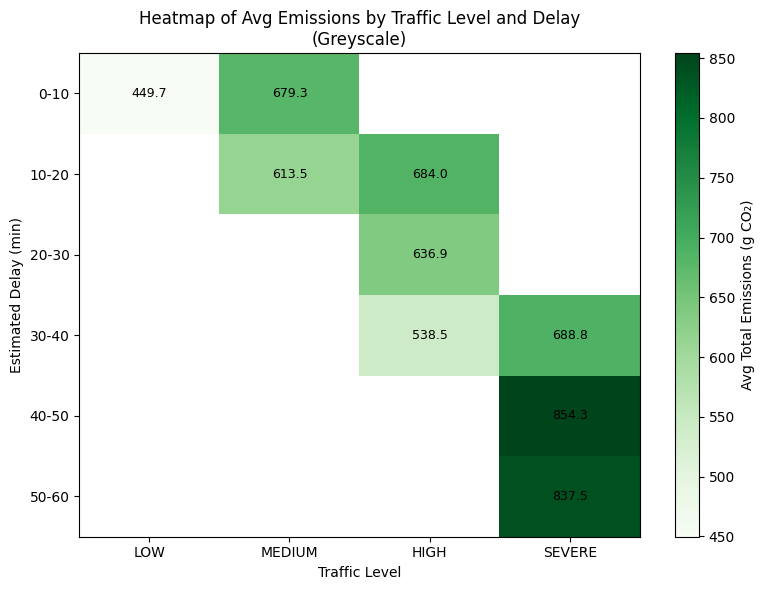

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Ensure rides is loaded and has the needed columns
# rides = pd.read_csv('your_rides.csv')  # if needed

# 2. Create delay bins from 0 to 60 minutes in steps of 10
bins = np.arange(0, 70, 10)  # 0–60 inclusive
labels = [f"{i}-{i+10}" for i in bins[:-1]]
rides['delay_bin'] = pd.cut(
    rides['estimated_delay_minutes'],
    bins=bins,
    labels=labels,
    right=False
)

# 3. Filter out rows with missing traffic_level, delay_bin, or emissions
df_heat = rides.dropna(subset=['traffic_level', 'delay_bin', 'total_emissions'])

# 4. Pivot: average total emissions by delay_bin and traffic_level
pivot = df_heat.pivot_table(
    index='delay_bin',
    columns='traffic_level',
    values='total_emissions',
    aggfunc='mean'
)

# 5. Order traffic levels
traffic_order = ['LOW', 'MEDIUM', 'HIGH', 'SEVERE']
pivot = pivot.reindex(columns=traffic_order)

# 6. Plot the heatmap in greyscale with annotations
plt.figure(figsize=(8, 6))
mat = plt.imshow(
    pivot.values,
    aspect='auto',
    interpolation='nearest',
    cmap='Greens'
)
plt.colorbar(mat, label='Avg Total Emissions (g CO₂)')
plt.xticks(ticks=np.arange(len(pivot.columns)), labels=pivot.columns)
plt.yticks(ticks=np.arange(len(pivot.index)), labels=pivot.index)
plt.xlabel('Traffic Level')
plt.ylabel('Estimated Delay (min)')
plt.title('Heatmap of Avg Emissions by Traffic Level and Delay\n(Greyscale)')

# 7. Add text labels
for i, delay_bin in enumerate(pivot.index):
    for j, traffic in enumerate(pivot.columns):
        val = pivot.loc[delay_bin, traffic]
        if not np.isnan(val):
            plt.text(
                j, i,
                f"{val:.1f}",
                ha='center', va='center',
                color='white' if val > pivot.values.max()/2 else 'black',
                fontsize=9
            )

plt.tight_layout()
plt.show()


### **Temporal Emissions Analysis**
This analysis examines how emissions vary throughout the day and between peak/off-peak hours.

Components

1. **Hourly Emissions Pattern**
   - Calculates average emissions per ride by hour
   - Uses hourly resampling of data
   - Visualizes daily emission patterns
   - Shows temporal distribution of environmental impact

2. **Peak vs. Off-Peak Comparison**
   - Peak hours: 7-9 AM and 5-7 PM
   - Off-peak hours: All other times
   - Compares average emissions per ride
   - Highlights impact of traffic congestion

Key Metrics
- Hourly average emissions per ride
- Peak period emissions average
- Off-peak period emissions average

Purpose
- Identify high-emission time periods
- Understand traffic impact on emissions
- Guide service scheduling
- Optimize fleet deployment

* For the trees equivalence soruices: https://ecotree.green/en/how-much-co2-does-a-tree-absorb#:~:text=A%20tree%20absorbs%20approximately%2025kg%20of%20CO2%20per%20year&text=But%20really%20a%20tree%20absorbs,a%20tree%20absorbs%20so%20interesting.




/var/folders/tg/8k_dxcxj2tlgnqhv569wql7r0000gn/T/ipykernel_9033/3144973086.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  emissions_hourly = rides['total_emissions'].resample('H').sum()
/var/folders/tg/8k_dxcxj2tlgnqhv569wql7r0000gn/T/ipykernel_9033/3144973086.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rides_hourly     = rides['ride_id'].resample('H').nunique()


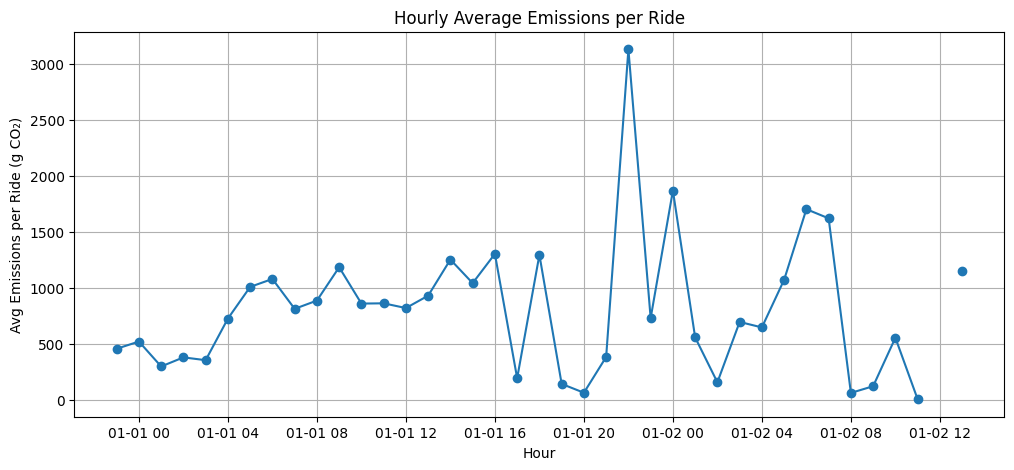

Peak Average Emissions per Ride:     1110.22 g CO₂
Off‑Peak Average Emissions per Ride:  985.75 g CO₂
Percent Difference (Peak vs Off‑Peak): 12.6%

Total Emissions (all data): 2245075 g CO₂
Equivalent to planting ~89.8 mature trees for one year (assuming 25 kg CO₂/tree·year).
Average Daily Emissions by Weekday:
event_time
Monday                NaN
Tuesday      3.636545e+04
Wednesday    2.142913e+06
Thursday     6.579597e+04
Friday                NaN
Saturday              NaN
Sunday                NaN


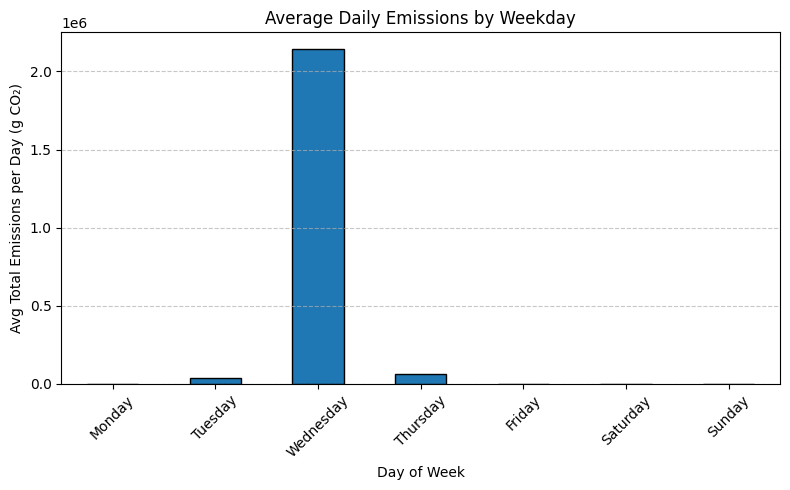

In [ ]:
# 1. Ensure 'event_time' is datetime and set as index
rides['event_time'] = pd.to_datetime(rides['timestamp'], unit='ms')
rides.set_index('event_time', inplace=True)

# -------------------------------------------------
# A) Average Emissions per Ride by Hour (Normalized)
# -------------------------------------------------
# Sum total emissions per hour
emissions_hourly = rides['total_emissions'].resample('H').sum()
# Count unique rides per hour
rides_hourly     = rides['ride_id'].resample('H').nunique()
# Compute average emissions per ride
avg_em_per_ride_hourly = emissions_hourly / rides_hourly

# Plot
plt.figure(figsize=(12, 5))
plt.plot(avg_em_per_ride_hourly.index, avg_em_per_ride_hourly.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Avg Emissions per Ride (g CO₂)')
plt.title('Hourly Average Emissions per Ride')
plt.grid(True)
plt.show()


# -------------------------------------------------
# B) Compare Peak vs. Off‑Peak Average Emissions
# -------------------------------------------------
# Define peak hours (e.g. 7–9am & 5–7pm)
rides['hour'] = rides.index.hour
peak_mask    = rides['hour'].isin([7, 8, 9, 17, 18, 19])

peak    = rides[peak_mask]
offpeak = rides[~peak_mask]

peak_avg    = peak['total_emissions'].sum() / peak['ride_id'].nunique()
offpeak_avg = offpeak['total_emissions'].sum() / offpeak['ride_id'].nunique()

# Compute percentage difference relative to off‑peak
pct_diff = (peak_avg - offpeak_avg) / offpeak_avg * 100

print(f"Peak Average Emissions per Ride:     {peak_avg:.2f} g CO₂")
print(f"Off‑Peak Average Emissions per Ride:  {offpeak_avg:.2f} g CO₂")
print(f"Percent Difference (Peak vs Off‑Peak): {pct_diff:.1f}%")


# -------------------------------------------------
# B) Weekly Emissions and Total Emissions
# -------------------------------------------------

# 1. Total emissions across all rides
total_emissions_all = rides['total_emissions'].sum()
print(f"\nTotal Emissions (all data): {total_emissions_all:.0f} g CO₂")

# Equivalence in number of trees (25 kg CO₂ absorbed per tree per year)
kg_per_tree = 25  # average CO₂ uptake per tree per year
g_per_tree = kg_per_tree * 1000  # convert to grams
num_trees = total_emissions_all / g_per_tree

print(f"Equivalent to planting ~{num_trees:.1f} mature trees for one year (assuming {kg_per_tree} kg CO₂/tree·year).")
# You would need about X mature trees growing for one full year to absorb the same X tonnes of CO₂ that your ride‑hailing operations emitted in total.

# 2. Compute daily total emissions
daily_emissions = rides['total_emissions'].resample('D').sum()

# 3. Average total emissions by day of week
#    Group the daily totals by weekday name, then take the mean
avg_emissions_by_weekday = (
    daily_emissions
    .groupby(daily_emissions.index.day_name())
    .mean()
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)

print("Average Daily Emissions by Weekday:")
print(avg_emissions_by_weekday.to_string())

# 4. Plot as a bar chart
plt.figure(figsize=(8,5))
avg_emissions_by_weekday.plot(kind='bar', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Avg Total Emissions per Day (g CO₂)')
plt.title('Average Daily Emissions by Weekday')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **Emission Spike Detection via Session Gaps**

This analysis identifies periods of unusually high emissions by grouping rides into sessions.

Methodology
1. **Session Definition**
   - Groups consecutive rides into sessions
   - New session starts after 5-minute gap
   - Tracks session start/end times
   - Counts rides per session

2. **Spike Detection**
   - Calculates total emissions per session
   - Sets threshold at 95th percentile
   - Flags sessions exceeding threshold
   - Identifies top 10 highest-emission sessions

Key Metrics
- Session duration
- Rides per session
- Total emissions per session
- 95th percentile threshold

*A spike in our logic is any session whose total_emissions is at or above the 95th‐percentile threshold of all sessions’ emissions. 

Purpose
- Identify unusual emission patterns
- Detect potential operational issues
- Monitor environmental impact spikes
- Guide service optimization

In [43]:
# 1. Sort by the datetime index (event_time)
rides_sorted = rides.sort_index()

# 2. Compute gaps (in minutes) between consecutive rides using the index
rides_sorted['gap_min'] = rides_sorted.index.to_series().diff().dt.total_seconds() / 60.0

# 3. Define sessions: start a new session whenever gap > 5 minutes
rides_sorted['new_session'] = (rides_sorted['gap_min'] > 5).astype(int)
rides_sorted['session_id']  = rides_sorted['new_session'].cumsum()

# 4. Aggregate metrics per session
session_agg = (
    rides_sorted
    .groupby('session_id')
    .agg(
        session_start    = ('ride_id', lambda _: _.index.min()),
        session_end      = ('ride_id', lambda _: _.index.max()),
        rides_in_session = ('ride_id', 'nunique'),
        total_emissions  = ('total_emissions', 'sum')
    )
    .reset_index()
)

# 5. Compute the 95th‑percentile threshold for total emissions
threshold = session_agg['total_emissions'].quantile(0.95)

# 6. Flag and extract spike sessions
session_agg['is_spike'] = session_agg['total_emissions'] >= threshold
spike_sessions = session_agg[session_agg['is_spike']]

# 7. Print the count and details of spikes
print(f"Number of spike sessions: {len(spike_sessions)}\n")
print("Spike Sessions (ID, Start, End, Rides Count, Total Emissions):")
print(
    spike_sessions[['session_id', 'session_start', 'session_end', 'rides_in_session', 'total_emissions']]
    .to_string(index=False)
)



Number of spike sessions: 5

Spike Sessions (ID, Start, End, Rides Count, Total Emissions):
 session_id           session_start             session_end  rides_in_session  total_emissions
          0 2024-12-31 23:00:08.370 2025-01-01 01:22:21.816               171     8.727832e+04
          1 2025-01-01 01:27:23.768 2025-01-01 03:37:46.557                69     2.725531e+04
          2 2025-01-01 03:46:41.171 2025-01-01 14:40:22.230              1792     1.995602e+06
          4 2025-01-01 15:19:37.090 2025-01-01 15:29:39.338                 6     1.239015e+04
         34 2025-01-01 22:02:30.822 2025-01-01 22:02:41.858                 2     6.806048e+03
